# Data Science Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
dat = pd.read_csv('titanic.csv')

In [2]:
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#encoding
dat['Sex_Numeric']=dat["Sex"].map({"female": 1, "male": 0})

In [4]:
#Percentage of female
dat['Sex_Numeric'].sum()/dat['Sex_Numeric'].count()

0.35241301907968575

In [5]:
dat['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
# Get the ceiling of fare
dat['Fare_ceil'] = np.ceil(dat['Fare'])
dat['Fare_ceil'].head()

0     8.0
1    72.0
2     8.0
3    54.0
4     9.0
Name: Fare_ceil, dtype: float64

In [7]:
dat['Fare_ceil'] = dat['Fare'].apply(np.ceil)
dat['Fare_ceil'].head()

0     8.0
1    72.0
2     8.0
3    54.0
4     9.0
Name: Fare_ceil, dtype: float64

In [8]:
drinks = pd.read_csv('drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [9]:
max_beer = max(drinks.beer_servings)
max_beer

376

In [10]:
max_spirit = max(drinks.spirit_servings)
max_spirit

438

In [11]:
max_wine = max(drinks.wine_servings)
max_wine

370

In [12]:
#max for alchohol
drinks.iloc[:, 1:4].apply(max, axis = 0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [13]:
#max for each continent
max_each = drinks.groupby('continent')['beer_servings'].max()
max_each.head()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
Name: beer_servings, dtype: int64

In [14]:
max_each = drinks.groupby('continent').agg({'beer_servings':'max'})
max_each.head()

,beer_servings
continent,
Africa,376
Asia,247
Europe,361
North America,285
Oceania,306


In [15]:
# the max sales type of the alchohol for each country
drinks.iloc[:, 1:4].apply(np.argmax, axis = 1).head()

d:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


0      beer_servings
1    spirit_servings
2      beer_servings
3      wine_servings
4      beer_servings
dtype: object

In [16]:
# Create a function-take input return four fold
four_fold = lambda x: 4*x


In [17]:
drinks['beer_4fold'] = list(map(four_fold, drinks.beer_servings))

In [18]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_4fold
0,Afghanistan,0,0,0,0.0,Asia,0
1,Albania,89,132,54,4.9,Europe,356
2,Algeria,25,0,14,0.7,Africa,100
3,Andorra,245,138,312,12.4,Europe,980
4,Angola,217,57,45,5.9,Africa,868


In [19]:
above30 = dat[dat['Age']>30]
above30.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Numeric,Fare_ceil
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,72.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,54.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,9.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,52.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,27.0


In [20]:
above30_female = dat[(dat['Age']>30) & (dat['Sex']=='female')]
above30_female.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Numeric,Fare_ceil
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,72.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,54.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,27.0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,1,16.0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,1,18.0


In [21]:
# data subset
dat_subset = dat.loc[:,['PassengerId', 'Survived', 'Cabin']]
dat[["PassengerId","Survived","Cabin"]].head()

,PassengerId,Survived,Cabin
0,1,0,NaN
1,2,1,C85
2,3,1,NaN
3,4,1,C123
4,5,0,NaN


In [22]:
dat_drop = dat.drop('Cabin', axis =1)
dat_drop.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Numeric,Fare_ceil
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,72.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,54.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,9.0


In [23]:
#subset, filter and arrange
dat_arrange = dat.loc[:,['PassengerId', 'Survived', 'Age']][(dat['Age']>30) & (dat['Sex']=='female')].sort_index(by = 'Age', ascending = False)
dat_arrange.head()

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,PassengerId,Survived,Age
275,276,1,63.0
483,484,1,63.0
829,830,1,62.0
366,367,1,60.0
195,196,1,58.0


In [24]:
dat.groupby('Sex').mean()['Age']

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [25]:
dat.groupby('Sex',as_index = False)['Age'].agg({'Mean':'mean',
                               'Median':'median',
                               'Diff': lambda x: x.mean()-x.median()})

,Sex,Mean,Median,Diff
0,female,27.915709,27.0,0.915709
1,male,30.726645,29.0,1.726645


In [26]:
dat[dat['Survived']==1].groupby('Sex').mean()['Age']

Sex
female    28.847716
male      27.276022
Name: Age, dtype: float64

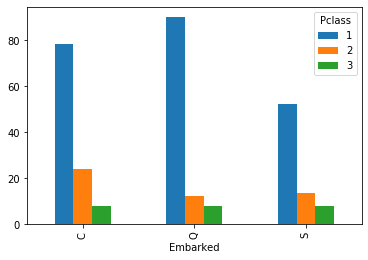

In [27]:
df = dat.groupby(['Embarked','Pclass']).median()['Fare'].unstack()
df.plot(kind = 'bar')

In [28]:
dat.groupby(['Embarked','Pclass']).median()['Fare'].reset_index()

,Embarked,Pclass,Fare
0,C,1,78.2667
1,C,2,24.0000
2,C,3,7.8958
3,Q,1,90.0000
4,Q,2,12.3500
5,Q,3,7.7500
6,S,1,52.0000
7,S,2,13.5000
8,S,3,8.0500


In [29]:
dat['age_cat'] = dat['Age'].apply(lambda x: 'Young' if x <= 50 else "Older")
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Numeric,Fare_ceil,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,8.0,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,72.0,Young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,8.0,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,54.0,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,9.0,Young


In [30]:
dat['age_cat_1'] = dat['Age'].apply(lambda x: 'Young' if x <= 20 else('Mature'if x <= 50 else "Older"))
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Numeric,Fare_ceil,age_cat,age_cat_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,8.0,Young,Mature
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,72.0,Young,Mature
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,8.0,Young,Mature
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,54.0,Young,Mature
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,9.0,Young,Mature


In [31]:
#24.
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [32]:
df = mpg.groupby('class').size().reset_index(name = 'counts')
df.head()

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33


In [33]:
df.apply(lambda x: str(x[0]) + "\n" + '(' + str(x[1]) + ')', axis = 1)
labels = df.apply(lambda x: str(x[0]) + "\n" + '(' + str(x[1]) + ')', axis = 1)
colors = plt.get_cmap('Spectral')(np.linspace(0,1,len(labels)))

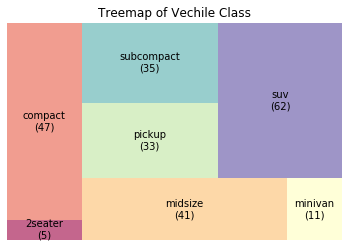

In [34]:
plt.figure()
squarify.plot(sizes = df['counts'], label = labels, color = colors, alpha = 0.6)
plt.axis('off')
plt.title("Treemap of Vechile Class")
plt.show()